In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

### IMPORTING DATA

In [121]:
data = pd.read_csv('train.csv', index_col = 'Loan_ID')

### DATA EXPLORATION

In [122]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [123]:
data.shape

(614, 12)

In [124]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [125]:
# NUMERICAL COLUMN NAMES
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [126]:
# CATEGORICAL COLUMN NAMES
categ_cols = [col for col in data.columns if data[col].dtype == 'object']
categ_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

#### NUMERICAL DISTRIBUTIONS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cbcc890>,
      dtype=object)

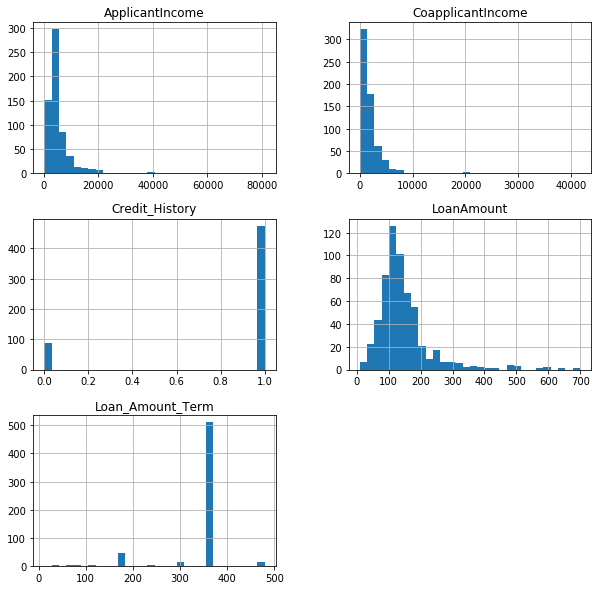

In [127]:
data.hist(column = numeric_cols, bins = 30, figsize=(10,10))

In [ ]:
# NOTES:
# OUTLIERS IN ApplicantIncome, CoapplicantIncome, LoanAmount

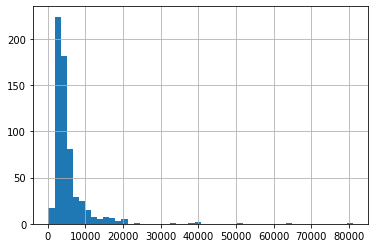

In [128]:
#DEEPER EXPLORATION ApplicantIncome Column

data['ApplicantIncome'].hist(bins = 50)

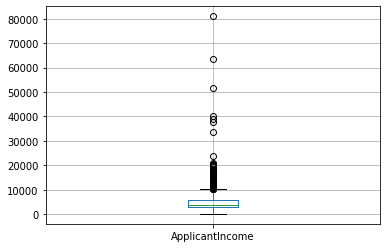

In [62]:
data.boxplot(column = 'ApplicantIncome')

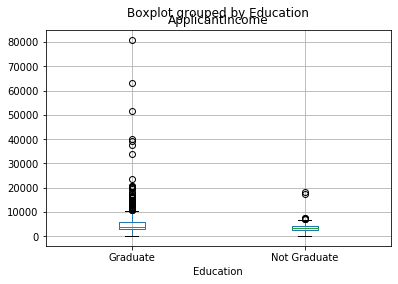

In [63]:
data.boxplot(column = 'ApplicantIncome', by = 'Education')

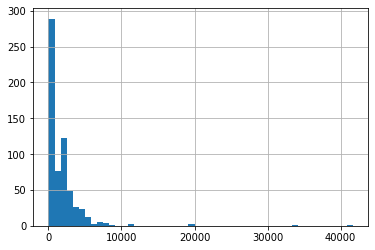

In [65]:
#DEEPER EXPLORATION CoapplicantIncome Column

data['CoapplicantIncome'].hist(bins = 50)

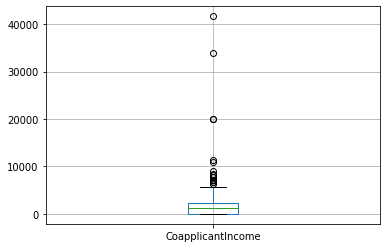

In [66]:
data.boxplot(column = 'CoapplicantIncome')

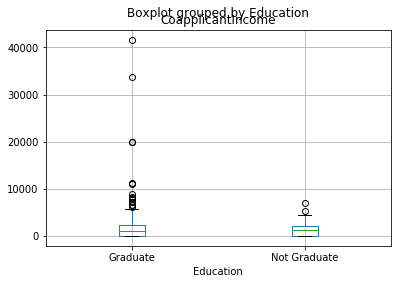

In [67]:
data.boxplot(column = 'CoapplicantIncome', by = 'Education')

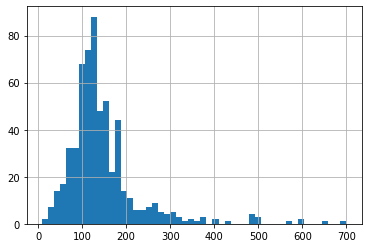

In [68]:
#DEEPER EXPLORATION LoanAmount Column

data['LoanAmount'].hist(bins = 50)

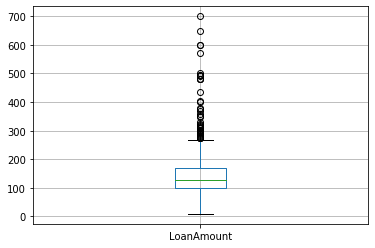

In [69]:
data.boxplot(column = 'LoanAmount')

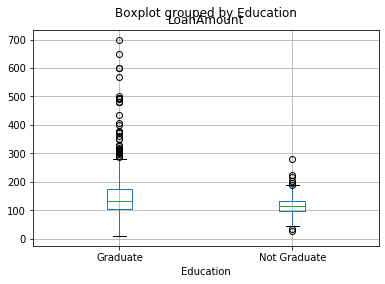

In [75]:
data.boxplot(column = 'LoanAmount', by = 'Education')

### CATEGORICAL DISTRIBUTIONS

In [89]:
# COLOR PALATTE
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

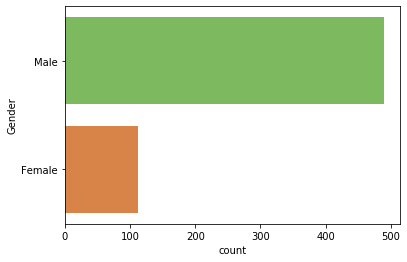

In [90]:
#GENDER BAR PLOT
sns.countplot(y = 'Gender', data= data , palette=pkmn_type_colors)

In [129]:
categ_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

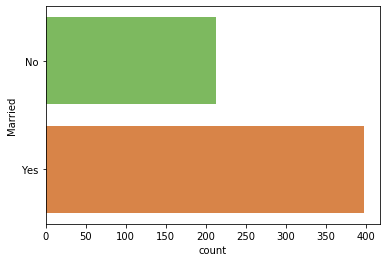

In [93]:
#MARRIED BAR PLOT
sns.countplot(y = 'Married', data = data, palette = pkmn_type_colors)

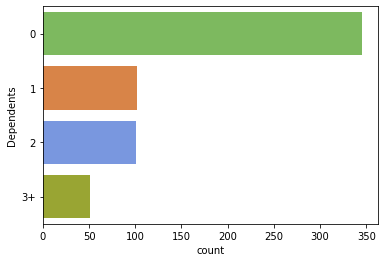

In [94]:
#DEPENDENTS BAR PLOT
sns.countplot(y = 'Dependents', data = data, palette = pkmn_type_colors)

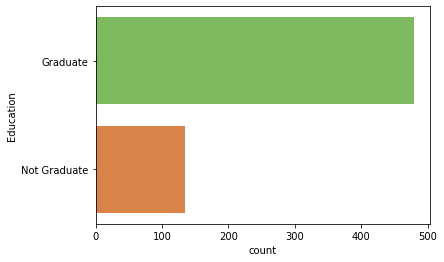

In [95]:
#EDUCATION BAR PLOT
sns.countplot(y = 'Education', data = data, palette = pkmn_type_colors)

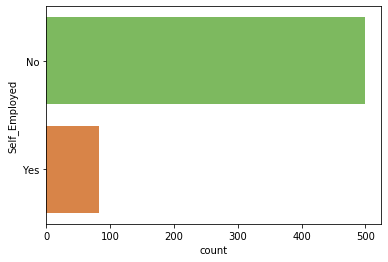

In [96]:
#SELF-EMPLOYED BAR PLOT
sns.countplot(y='Self_Employed', data = data, palette = pkmn_type_colors)

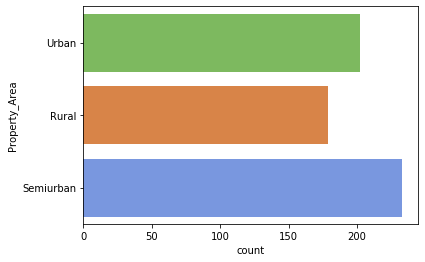

In [97]:
#PROPERTY AREA BAR PLOT
sns.countplot(y = 'Property_Area', data = data, palette = pkmn_type_colors)

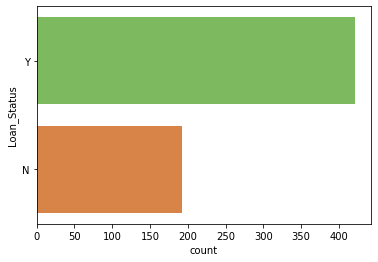

In [107]:
#LOAN STATUS BAR PLOT
sns.countplot(y = 'Loan_Status', data = data, palette = pkmn_type_colors)

##### BOX PLOTS

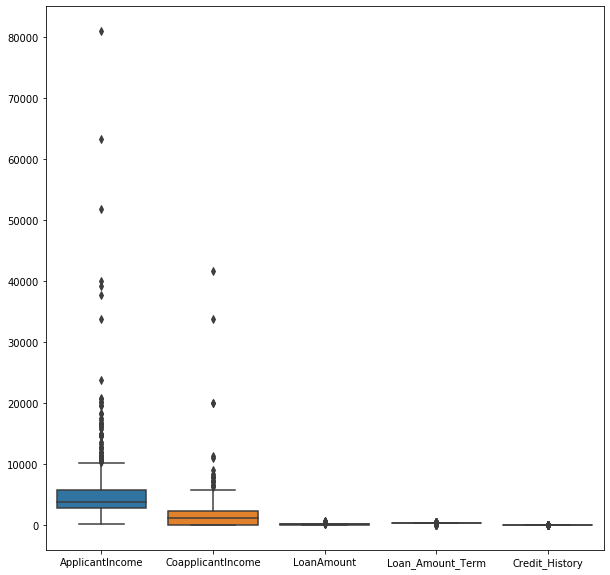

In [117]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

sns.boxplot(data= data)

##### CORRELATION

In [132]:
#HEATMAP

# positive correlation between LoanAmount and Applicantincome about 0.57

In [130]:
#MAKING COPY OF EXISTING DATAFRAME AND TURNING ALL CATEGORICAL VALUES INTO NUMBER, SO I CAN SEE THE CORRELATIONS
data2 = data.copy()
data2['Married'] =data2['Married'].astype('category').cat.codes
data2['Education'] =data2['Education'].astype('category').cat.codes
data2['Self_Employed'] =data2['Self_Employed'].astype('category').cat.codes
data2['Property_Area'] =data2['Property_Area'].astype('category').cat.codes
data2['Loan_Status'] =data2['Loan_Status'].astype('category').cat.codes
data2['Dependents'] =data2['Dependents'].astype('category').cat.codes
data2['Gender'] =data2['Gender'].astype('category').cat.codes

In [131]:
#CALCULATIG THE CORRELATION
corr2 = data2.corr()
corr2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.277459,0.109018,0.068774,-0.031116,-0.024689,0.073642,0.022476,-0.060937,0.034345,-0.008142,0.029040
Married,0.277459,1.000000,0.345269,0.022530,0.030171,0.047691,0.083270,0.144883,-0.104901,-0.003453,-0.003370,0.075547
Dependents,0.109018,0.345269,1.000000,0.051414,0.048221,0.115686,0.033955,0.166324,-0.103982,-0.025316,-0.009085,0.014263
Education,0.068774,0.022530,0.051414,1.000000,0.000820,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
Self_Employed,-0.031116,0.030171,0.048221,0.000820,1.000000,0.092967,-0.052384,0.083761,-0.017833,-0.038374,-0.028730,-0.011332
ApplicantIncome,-0.024689,0.047691,0.115686,-0.140760,0.092967,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.073642,0.083270,0.033955,-0.062290,-0.052384,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.022476,0.144883,0.166324,-0.171133,0.083761,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.060937,-0.104901,-0.103982,-0.078784,-0.017833,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.034345,-0.003453,-0.025316,-0.081822,-0.038374,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


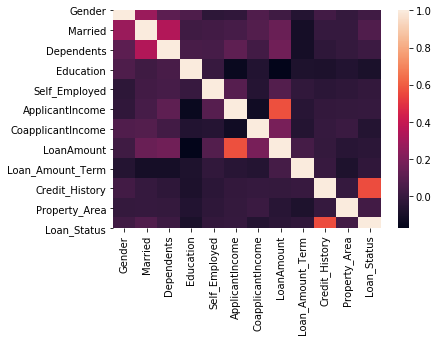

In [132]:
#HEATMAP
sns.heatmap(corr2)
# NOTES:
# -STRONG CORELLATION BETWEEN:
#   *ApplicantIncome and LoanAmount 0.570909
#   *Loan_Status and Credit_History 0.561678

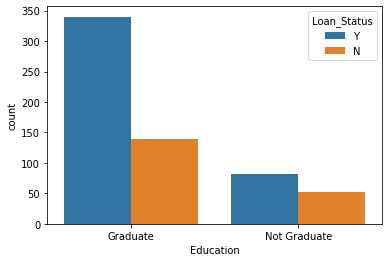

In [133]:
# Checking if education effects the loan approval
sns.countplot(x = 'Education', hue="Loan_Status", data=data)

### MAKING BASELINE MODEL

In [134]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [424]:
#Splitting data into X and y
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

#Selectin only numerical columns
X_num = X.select_dtypes(exclude = 'object')

#Checking for columns with missing value
X_missing = [col for col in X_num if X_num[col].isnull().any()]

#Selecting columns only with non missing values
X_num_miss = X_num.drop(X_missing, axis = 1)


#Modeling and getting score
#Splitting data
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_num_miss, y, random_state = 0)
    
#Choosing a model
model = RandomForestClassifier()
    
#Fitting the model
model.fit(X_train2, y_train2)
    
#Predicting the model
predictions = model.predict(X_valid2)
    
#The score
accuracy_score(y_valid2, predictions)  # 0.538961038961039

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5974025974025974

### Pre-processing

##### Imputing missing values in numerical columns

In [425]:
# This function uses randomforest for modeling classification algorithm and gives score
# @param X_train, X_valid, y_train, y_valid splitted data to be trained and fitted to a model
# @return accuracy_score, gives the score of predicted model
#
def model_and_score(X_train, X_valid, y_train, y_valid):
    
    #Choosing a model
    #best hyperparameter values after testing
    model = RandomForestClassifier(n_estimators = 100 ,max_depth = 7, random_state = 0)
    
    #Fitting the model
    model.fit(X_train, y_train)
    
    #Predicting the model
    predictions = model.predict(X_valid)
    
    #returning the score
    return accuracy_score(y_valid, predictions)

In [426]:
#Splitting data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)


#Selecting only numerical columns
X_train_num = X_train.select_dtypes(exclude = 'object')
X_valid_num = X_valid.select_dtypes(exclude = 'object')



# Imputation object
imputer_num = SimpleImputer(strategy = 'mean')

# Imputation numerical columns
imputed_X_train_num = pd.DataFrame(imputer_num.fit_transform(X_train_num))
imputed_X_valid_num = pd.DataFrame(imputer_num.transform(X_valid_num))


#Importing Scaling object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Scaling the numerical values, to imporve performance
imputed_X_train_num = pd.DataFrame(scaler.fit_transform(imputed_X_train_num))
imputed_X_valid_num = pd.DataFrame(scaler.transform(imputed_X_valid_num))



#Imputation and Scaline removes column names and index! We are putting them back
imputed_X_train_num.columns = X_train_num.columns
imputed_X_valid_num.columns = X_valid_num.columns

imputed_X_train_num.index = X_train_num.index
imputed_X_valid_num.index = X_valid_num.index



#-------------------------------------------------------------

#The score with numerical imputed columns
model_and_score(imputed_X_train_num, imputed_X_valid_num, y_train, y_valid) # 0.8116883116883117 

0.8116883116883117

##### Imputing missing values in categorical columns

In [427]:
from sklearn.preprocessing import LabelEncoder

#Selecting only categorical columns
X_train_cat = X_train.select_dtypes(include = 'object')
X_valid_cat = X_valid.select_dtypes(include = 'object')

# Imputation object
imputer_cat = SimpleImputer(strategy = 'most_frequent')

# Imputation missing categorical columns with most frequent value
imputed_X_train_cat = pd.DataFrame(imputer_cat.fit_transform(X_train_cat))
imputed_X_valid_cat = pd.DataFrame(imputer_cat.transform(X_valid_cat))

#Imputation removes column names! We are putting them back
imputed_X_train_cat.columns = X_train_cat.columns
imputed_X_valid_cat.columns = X_valid_cat.columns

imputed_X_train_cat.index = X_train_cat.index
imputed_X_valid_cat.index = X_valid_cat.index

#Check missing values in the imputed dataframe
imputed_X_train_cat.apply(lambda x: sum(x.isnull()), axis = 0)

#printing value counts on each columns to understand which columns are nominal and ordinal
#for col in imputed_X_train_cat.columns:
    #print(imputed_X_train_cat[col].value_counts())
    #print()

#-----------------------------------------------------
#columns with LabelEncoding 
label = ['Dependents', 'Property_Area']

#getting columns 'Dependets' and 'Property_Area' only
label_col_train = imputed_X_train_cat[label]
label_col_valid = imputed_X_valid_cat[label]

# Apply label encoder to each ordinal column in categorical data
label_encoder = LabelEncoder()
for col in label_col_train:
    label_col_train[col] = label_encoder.fit_transform(label_col_train[col])
    label_col_valid[col] = label_encoder.transform(label_col_valid[col])

label_col_train
label_col_valid


#-----------------------------------------------------
#Getting dummy variables
imputed_X_train_cat_dummies = pd.get_dummies(imputed_X_train_cat.drop(label, axis = 1))
imputed_X_valid_cat_dummies = pd.get_dummies(imputed_X_valid_cat.drop(label, axis = 1))
model_and_score(imputed_X_train_cat_dummies, imputed_X_valid_cat_dummies, y_train, y_valid)
#0.7272727272727273

#------------------------------------------------------
#Concatinating ordinal and nominal categorical columns
final_train_categ = pd.concat([imputed_X_train_cat_dummies, label_col_train], axis=1, sort=False)
final_valid_categ = pd.concat([imputed_X_valid_cat_dummies, label_col_valid], axis=1, sort=False)
model_and_score(final_train_categ, final_valid_categ, y_train, y_valid)
#0.7337662337662337



#------------------------------------------------------
#Concatinating numerical and categorical columns
final_data_train = pd.concat([imputed_X_train_num, final_train_categ], axis=1, sort=False)
final_data_valid = pd.concat([imputed_X_valid_num, final_valid_categ], axis=1, sort=False)

#The score with numerical imputed columns and with dummie variables
model_and_score(final_data_train, final_data_valid, y_train, y_valid)
#0.8311688311688312



/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.8311688311688312

In [428]:
#-- ALL SCORES --#

print('Baseline score: {}'.format(accuracy_score(y_valid2, predictions)))
print('The score with only numerical values: {}'.format(model_and_score(imputed_X_train_num, imputed_X_valid_num, y_train, y_valid)))
print('The score with only dummy variables: {}'.format(model_and_score(imputed_X_train_cat_dummies, imputed_X_valid_cat_dummies, y_train, y_valid)))
print('The score with dummy and label encoded categorical variables: {}'.format(model_and_score(final_train_categ, final_valid_categ, y_train, y_valid)))
print('The score with numerical, dummy and label encoded categorical variables: {}'.format(model_and_score(final_data_train, final_data_valid, y_train, y_valid)))


Baseline score: 0.5974025974025974
The score with only numerical values: 0.8116883116883117
The score with only dummy variables: 0.6883116883116883
The score with dummy and label encoded categorical variables: 0.7597402597402597
The score with numerical, dummy and label encoded categorical variables: 0.8311688311688312


### MODELLING WITH PIPELINE

In [347]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [354]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy = 'mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categ_col_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, list(X_train_num.columns)),
        ('cat', categorical_transformer, categ_col_names)])

#Choosing a model
#best hyperparameter values after testing
model = RandomForestClassifier(n_estimators = 100 ,max_depth = 7, random_state = 0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)


# Evaluate the model
score2 = accuracy_score(y_valid, preds)
print(score2)




0.8311688311688312


### xgboost modelling

In [499]:
import xgboost as xgb
# Create XGB Classifier object
xgb_clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.06)
# Fit model
xgb_model = xgb_clf.fit(final_data_train, y_train)

# Predictions
y_test_preds = xgb_model.predict(final_data_valid)

print("Test Accuracy: ", accuracy_score(y_valid, y_test_preds))



Test Accuracy:  0.8571428571428571


In [432]:
#-- ALL SCORES --#

print('Baseline score: {}'.format(accuracy_score(y_valid2, predictions)))
print('The score with only numerical values: {}'.format(model_and_score(imputed_X_train_num, imputed_X_valid_num, y_train, y_valid)))
print('The score with only dummy variables: {}'.format(model_and_score(imputed_X_train_cat_dummies, imputed_X_valid_cat_dummies, y_train, y_valid)))
print('The score with dummy and label encoded categorical variables: {}'.format(model_and_score(final_train_categ, final_valid_categ, y_train, y_valid)))
print('The score with numerical, dummy and label encoded categorical variables: {}'.format(model_and_score(final_data_train, final_data_valid, y_train, y_valid)))
print("The score with XGboosting:", accuracy_score(y_valid, y_test_preds))

Baseline score: 0.5974025974025974
The score with only numerical values: 0.8116883116883117
The score with only dummy variables: 0.6883116883116883
The score with dummy and label encoded categorical variables: 0.7597402597402597
The score with numerical, dummy and label encoded categorical variables: 0.8311688311688312
The score with XGboosting: 0.8571428571428571


### Loading and Testing the Test set

In [505]:
#Loading data set
test_csv = pd.read_csv('test.csv', index_col = 'Loan_ID')

#-----------------------------------------------------------#

#numerical features only
test_num = test_csv.select_dtypes(exclude = 'object')


# Imputation object
imputer_num = SimpleImputer(strategy = 'mean')


# Imputation numerical columns
test_num = pd.DataFrame(imputer_num.fit_transform(test_num))


#Importing Scaling object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Scaling the numerical values, to imporve performance
test_num = pd.DataFrame(scaler.fit_transform(test_num))


#Imputation and Scaline removes column names and index! We are putting them back
test_num.columns = test_csv.select_dtypes(exclude = 'object').columns
test_num.index = test_csv.select_dtypes(exclude = 'object').index

#-----------------------------------------------------------#
from sklearn.preprocessing import LabelEncoder

#Categorical features only
test_cat = test_csv.select_dtypes(include = 'object')

# Imputation object
imputer_cat = SimpleImputer(strategy = 'most_frequent')

# Imputation missing categorical columns with most frequent value
test_cat = pd.DataFrame(imputer_cat.fit_transform(test_cat))

#Imputation removes column names! We are putting them back
test_cat.columns = test_csv.select_dtypes(include = 'object').columns
test_cat.index = test_csv.select_dtypes(include = 'object').index

#Check missing values in the imputed dataframe
test_cat.apply(lambda x: sum(x.isnull()), axis = 0)


#columns with LabelEncoding 
label_e = ['Dependents', 'Property_Area']


#getting columns 'Dependets' and 'Property_Area' only
label_col_test = test_cat[label_e]



# Apply label encoder to each ordinal column in categorical data
label_encoder = LabelEncoder()
for col in label_col_test:
    label_col_test[col] = label_encoder.fit_transform(label_col_test[col])
    

#Getting dummy variables in nominal columns in categorical data
dummy_columns = pd.get_dummies(test_cat.drop(label_e, axis = 1))


#Concatinating ordinal and nominal categorical columns
test_cat_all = pd.concat([dummy_columns, label_col_test], axis =1, sort = False)

#-----------------------------------------------------------#

#Concatinating numerical and categorical columns
test_data_all = pd.concat([test_num, test_cat_all], axis = 1, sort = False)

#-----------------------------------------------------------#

#Choosing the best model from testing which is XGboost
final_model = xgb_model
final_prediction = final_model.predict(test_data_all)

#Making dataframe with Loan_Id and Loan_Status
output = pd.DataFrame({'Loan_ID': test_data_all.index, 'Loan_Status': final_prediction})

output.to_csv('submission.csv', index=False)



/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
